Nous allons traiter les données sur Python en utilisant SciKit-Learn.

# 1. Importation des données

In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Nous importons les données grâce à pandas.

In [296]:
data = pd.read_csv('C:/Users/Bertrand/Desktop/M2/FDEC/Projet/donnees-defi-egc.csv' )
print(data.shape)
data.head()

(15375, 34)


,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,CODE,CODE_PARENT,CODE_PARENT_DESC,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,...,TYPEIMPLANTATIONPLU,VARIETE,VIGUEUR,coord_x,coord_y,DEFAUT,Collet,Houppier,Racine,Tronc
0,5,2014,2014,2019,ESP33155,ESP385,R D Fontanelle ang Essen JO,10 à 20 cm,cordata,passages fréquents ou arrêts,...,?,?,vigoureux,1.915371e+06,4.222837e+06,0,0,0,0,0
1,3,2004,2013,?,ESP2079,ESP116,Crs Libération Beauvert Alliés,30 à 40 cm,acerifolia,passages fréquents et arrêts fréquents,...,?,?,vigoureux,1.913250e+06,4.222531e+06,0,0,0,0,0
2,3,2004,?,2014,ESP26205,ESP635,Pl R Frappat ang Eaux Claires,10 à 20 cm,grandiflora,passages fréquents ou arrêts,...,?,?,vigoureux,1.913087e+06,4.223524e+06,0,0,0,0,0
3,2,2004,2014,2014,ESP7496,ESP109,R François Raoult,40 à 50 cm,japonica,passages fréquents et arrêts fréquents,...,?,?,vigoureux,1.914187e+06,4.224275e+06,1,0,1,1,0
4,1,2004,2013,?,ESP2547,ESP194,Terminus Tram Esclangon,20 à 30 cm,americana,passages fréquents et arrêts fréquents,...,?,?,vigoureux,1.912975e+06,4.225210e+06,0,0,0,0,0


In [297]:
data.describe()

,ADR_SECTEUR,ANNEEDEPLANTATION,coord_x,coord_y,DEFAUT,Collet,Houppier,Racine,Tronc
count,15375.000000,15375.000000,1.537500e+04,1.537500e+04,15375.000000,15375.000000,15375.000000,15375.000000,15375.000000
mean,3.680455,2004.927610,1.914222e+06,4.223314e+06,0.325268,0.060423,0.215610,0.046959,0.133984
std,1.678015,2.604701,1.001492e+03,1.319505e+03,0.468490,0.238276,0.411258,0.211559,0.340646
min,1.000000,2004.000000,1.911907e+06,4.220467e+06,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2004.000000,1.913352e+06,4.222201e+06,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2004.000000,1.914340e+06,4.223104e+06,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,2004.000000,1.915048e+06,4.224558e+06,1.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,2015.000000,1.916252e+06,4.226534e+06,1.000000,1.000000,1.000000,1.000000,1.000000


# 2. Analyse des données avant traitement

Nous allons déterminer le nombre de valeurs manquantes pour chacun des attributs.

In [298]:
data = data.replace('?',np.nan)

missing_values = data.isnull().sum()
missing_values

ADR_SECTEUR                       0
ANNEEDEPLANTATION                 0
ANNEEREALISATIONDIAGNOSTIC        8
ANNEETRAVAUXPRECONISESDIAG     4511
CODE                              0
CODE_PARENT                       0
CODE_PARENT_DESC                  0
DIAMETREARBREAUNMETRE            67
ESPECE                         1018
FREQUENTATIONCIBLE                1
GENRE_BOTA                        0
IDENTIFIANTPLU                15014
INTITULEPROTECTIONPLU         15014
NOTEDIAGNOSTIC                   40
PRIORITEDERENOUVELLEMENT        127
RAISONDEPLANTATION            15145
REMARQUES                     11176
SOUS_CATEGORIE                    0
SOUS_CATEGORIE_DESC               0
STADEDEDEVELOPPEMENT             51
STADEDEVELOPPEMENTDIAG           13
TRAITEMENTCHENILLES           14287
TRAVAUXPRECONISESDIAG          4525
TROTTOIR                          0
TYPEIMPLANTATIONPLU           15014
VARIETE                       13212
VIGUEUR                          11
coord_x                     

On enlève les attributs ayant trop de valeurs manquantes pour être utile pour l'étude. On choisit d'enlever les attributs avec plus de 10000 valeurs manquantes.

In [299]:
data = data.drop(columns=['IDENTIFIANTPLU','INTITULEPROTECTIONPLU','RAISONDEPLANTATION','REMARQUES','TRAITEMENTCHENILLES','TYPEIMPLANTATIONPLU','VARIETE'])
data.head()

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,CODE,CODE_PARENT,CODE_PARENT_DESC,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,...,TRAVAUXPRECONISESDIAG,TROTTOIR,VIGUEUR,coord_x,coord_y,DEFAUT,Collet,Houppier,Racine,Tronc
0,5,2014,2014,2019,ESP33155,ESP385,R D Fontanelle ang Essen JO,10 à 20 cm,cordata,passages fréquents ou arrêts,...,Controle,non,vigoureux,1.915371e+06,4.222837e+06,0,0,0,0,0
1,3,2004,2013,NaN,ESP2079,ESP116,Crs Libération Beauvert Alliés,30 à 40 cm,acerifolia,passages fréquents et arrêts fréquents,...,NaN,non,vigoureux,1.913250e+06,4.222531e+06,0,0,0,0,0
2,3,2004,NaN,2014,ESP26205,ESP635,Pl R Frappat ang Eaux Claires,10 à 20 cm,grandiflora,passages fréquents ou arrêts,...,Controle,oui,vigoureux,1.913087e+06,4.223524e+06,0,0,0,0,0
3,2,2004,2014,2014,ESP7496,ESP109,R François Raoult,40 à 50 cm,japonica,passages fréquents et arrêts fréquents,...,Taille mise en sécurité,oui,vigoureux,1.914187e+06,4.224275e+06,1,0,1,1,0
4,1,2004,2013,NaN,ESP2547,ESP194,Terminus Tram Esclangon,20 à 30 cm,americana,passages fréquents et arrêts fréquents,...,NaN,oui,vigoureux,1.912975e+06,4.225210e+06,0,0,0,0,0


Comme il nous reste des valeurs manquantes, nous allons dans la suite enlever les arbres sur lesquels ils manquent au moins une valeur.

In [300]:
d=data.T.isnull().sum()
a=d.shape
p=[]
for i in range (0,a[0]):
    if (d[i]>0):
        p.append(i)
data1=data.drop(p)
data1

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,CODE,CODE_PARENT,CODE_PARENT_DESC,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,...,TRAVAUXPRECONISESDIAG,TROTTOIR,VIGUEUR,coord_x,coord_y,DEFAUT,Collet,Houppier,Racine,Tronc
0,5,2014,2014,2019,ESP33155,ESP385,R D Fontanelle ang Essen JO,10 à 20 cm,cordata,passages fréquents ou arrêts,...,Controle,non,vigoureux,1.915371e+06,4.222837e+06,0,0,0,0,0
3,2,2004,2014,2014,ESP7496,ESP109,R François Raoult,40 à 50 cm,japonica,passages fréquents et arrêts fréquents,...,Taille mise en sécurité,oui,vigoureux,1.914187e+06,4.224275e+06,1,0,1,1,0
5,3,2004,2015,2018,ESP11866,ESP872,Pc Ch Elysés Ouest,40 à 50 cm,abies,passages fréquents et arrêts fréquents,...,Controle résistographe,non,vigoureux,1.912600e+06,4.222098e+06,1,1,0,0,0
6,6,2004,2013,2020,ESP5219,ESP1398,Prc La Bruyère accés SUD,30 à 40 cm,excelsior,passages fréquents et arrêts fréquents,...,Taille de bois mort,non,vigoureux,1.914850e+06,4.222165e+06,0,0,0,0,0
7,2,2004,2014,2014,ESP2708,ESP1311,Jard Hoche pas Est Malraux,30 à 40 cm,nigra,passages fréquents et arrêts fréquents,...,Taille de bois mort,non,vieillissement dépérissement,1.914403e+06,4.224092e+06,1,0,1,0,0
11,4,2004,2014,2014,ESP1429,ESP666,Av Champon pair,40 à 50 cm,tomentosa,passages fréquents et arrêts fréquents,...,Taille rideau,oui,vigoureux,1.914626e+06,4.223904e+06,1,0,1,0,0
12,5,2004,2013,2016,ESP19508,ESP1343,R Frederico Garcia Lorca park,20 à 30 cm,japonica,passages fréquents et arrêts fréquents,...,Taille déclaircie,oui,vigoureux,1.914915e+06,4.222701e+06,0,0,0,0,0
13,1,2005,2015,2018,ESP9274,ESP1287,Bd J Vallier voie tram pair,10 à 20 cm,verrucosa,passages fréquents et arrêts fréquents,...,Taille formation et mise au gabarit,non,vigoureux,1.913274e+06,4.223605e+06,0,0,0,0,0
17,4,2004,2015,2016,ESP30513,ESP1073,Sq L Blum ang Stalingrad,20 à 30 cm,japonica,passages fréquents et arrêts fréquents,...,Abattage,non,vieillissement dépérissement,1.914017e+06,4.222361e+06,1,0,0,0,1
19,4,2004,2013,2018,ESP23661,ESP1022,R Marquian MIN,30 à 40 cm,acerifolia,passages fréquents et arrêts fréquents,...,Taille formation et mise au gabarit,oui,vigoureux,1.913629e+06,4.222635e+06,0,0,0,0,0


Maintenant nous allons modifier les variables qualitatives qui sont écrient avec des chaînes de caractères, par des valeurs numériques afin de pouvoir créer des Random Forest Classifier.

In [302]:
data1.columns

Index(['ADR_SECTEUR', 'ANNEEDEPLANTATION', 'ANNEEREALISATIONDIAGNOSTIC',
       'ANNEETRAVAUXPRECONISESDIAG', 'CODE', 'CODE_PARENT', 'CODE_PARENT_DESC',
       'DIAMETREARBREAUNMETRE', 'ESPECE', 'FREQUENTATIONCIBLE', 'GENRE_BOTA',
       'NOTEDIAGNOSTIC', 'PRIORITEDERENOUVELLEMENT', 'SOUS_CATEGORIE',
       'SOUS_CATEGORIE_DESC', 'STADEDEDEVELOPPEMENT', 'STADEDEVELOPPEMENTDIAG',
       'TRAVAUXPRECONISESDIAG', 'TROTTOIR', 'VIGUEUR', 'coord_x', 'coord_y',
       'DEFAUT', 'Collet', 'Houppier', 'Racine', 'Tronc'],
      dtype='object')

In [303]:
# Cette méthode n'est pas des plus optimale, mais est simple à réaliser.
X=np.array(data1.drop(columns=['ADR_SECTEUR','ANNEEDEPLANTATION','CODE','CODE_PARENT','CODE_PARENT_DESC','coord_x','coord_y','DEFAUT','Collet','Houppier','Racine','Tronc']))

P1=[]
for a in X[:,2] :
    if (a not in P1):
        P1.append(a)

P2=[]
for b in X[:,3] :
    if (b not in P2):
        P2.append(b)

P3=[]
for b in X[:,4] :
    if (b not in P3):
        P3.append(b)

P4=[]
for b in X[:,5] :
    if (b not in P4):
        P4.append(b)

P5=[]
for b in X[:,6] :
    if (b not in P5):
        P5.append(b)

P6=[]
for b in X[:,7] :
    if (b not in P6):
        P6.append(b)

P7=[]
for a in X[:,8] :
    if (a not in P7):
        P7.append(a)

P8=[]
for b in X[:,9] :
    if (b not in P8):
        P8.append(b)

P9=[]
for b in X[:,10] :
    if (b not in P9):
        P9.append(b)

P10=[]
for b in X[:,11] :
    if (b not in P10):
        P10.append(b)

P11=[]
for b in X[:,12] :
    if (b not in P11):
        P11.append(b)

P12=[]
for b in X[:,13] :
    if (b not in P12):
        P12.append(b)

P13=[]
for b in X[:,14] :
    if (b not in P13):
        P13.append(b)

data1 = data1.replace(P1,[i for i in range(len(P1))])
data1 = data1.replace(P2,[i for i in range(len(P2))])
data1 = data1.replace(P3,[i for i in range(len(P3))])
data1 = data1.replace(P4,[i for i in range(len(P4))])
data1 = data1.replace(P5,[i for i in range(len(P5))])
data1 = data1.replace(P6,[i for i in range(len(P6))])
data1 = data1.replace(P7,[i for i in range(len(P7))])
data1 = data1.replace(P8,[i for i in range(len(P8))])
data1 = data1.replace(P9,[i for i in range(len(P9))])
data1 = data1.replace(P10,[i for i in range(len(P10))])
data1 = data1.replace(P11,[i for i in range(len(P11))])
data1 = data1.replace(P12,[i for i in range(len(P12))])
data1 = data1.replace(P13,[i for i in range(len(P13))])
data1.describe()

,ADR_SECTEUR,ANNEEDEPLANTATION,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,GENRE_BOTA,NOTEDIAGNOSTIC,PRIORITEDERENOUVELLEMENT,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,...,TRAVAUXPRECONISESDIAG,TROTTOIR,VIGUEUR,coord_x,coord_y,DEFAUT,Collet,Houppier,Racine,Tronc
count,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,...,9913.000000,9913.000000,9913.000000,9.913000e+03,9.913000e+03,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000
mean,3.644507,2005.156461,2.954807,26.034702,0.816302,13.299203,0.713911,0.563200,0.640573,0.640573,...,4.348936,0.318370,0.376980,1.914218e+06,4.223359e+06,0.360133,0.060829,0.262181,0.053062,0.132755
std,1.755231,2.949404,3.083414,31.487715,0.414926,13.070441,1.227816,0.960828,0.656682,0.656682,...,2.954560,0.465867,0.763117,9.927392e+02,1.366521e+03,0.480063,0.239029,0.439843,0.224168,0.339327
min,1.000000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.911907e+06,4.220481e+06,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2004.000000,0.000000,7.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.913384e+06,4.222202e+06,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2004.000000,2.000000,12.000000,1.000000,8.000000,0.000000,0.000000,1.000000,1.000000,...,6.000000,0.000000,0.000000,1.914345e+06,4.223158e+06,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,2004.000000,5.000000,33.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,1.000000,0.000000,1.915020e+06,4.224583e+06,1.000000,0.000000,1.000000,0.000000,0.000000
max,6.000000,2015.000000,17.000000,202.000000,2.000000,95.000000,4.000000,3.000000,3.000000,3.000000,...,14.000000,1.000000,2.000000,1.916250e+06,4.226534e+06,1.000000,1.000000,1.000000,1.000000,1.000000


# Traitement des données

Nous allons créer une Random Forest Classifier pour prédire si un arbre a un défaut ou non.

In [305]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X=np.array(data1.drop(columns=['CODE','CODE_PARENT','CODE_PARENT_DESC','coord_x','coord_y','DEFAUT','Collet','Houppier','Racine','Tronc']))
y=np.array(data1['DEFAUT'])

clf = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
print('Score de notre Random Forest Classifier pour un défaut : ',scores.mean())

Score pour un défaut :  0.8757183791796364


Et maintenant, nous allons prédire où se situe le défaut, en utilisant une Random Forest Classifier.

In [306]:
y1=np.array(data1['Collet'])

y2=np.array(data1['Houppier'])

y3=np.array(data1['Racine'])

y4=np.array(data1['Tronc'])


scores1 = cross_val_score(clf, X, y1, cv=5)

scores2 = cross_val_score(clf, X, y2, cv=5)

scores3 = cross_val_score(clf, X, y3, cv=5)

scores4 = cross_val_score(clf, X, y4, cv=5)

print(' Voici le score pour le collet : ',scores1.mean(),'\n Voici le score pour le Houppier : ',scores2.mean(),'\n Voici le score pour la Racine : ', scores3.mean(),'\n Voici le score pour le Tronc : ', scores4.mean())

 Voici le score pour le collet :  0.9473420644601209 
 Voici le score pour le Houppier :  0.8714820548106662 
 Voici le score pour la Racine :  0.9447182940553442 
 Voici le score pour le Tronc :  0.8803608548032613


In [307]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2)

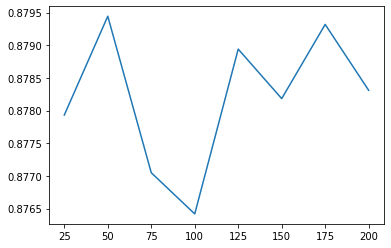

In [308]:
from sklearn.model_selection import validation_curve

model = RandomForestClassifier(max_depth=None,min_samples_split=2, random_state=0)
k=np.array(range (25,201,25))

train_score, val_score = validation_curve(model, X_train, Y_train, 'n_estimators', k, cv=5)

plt.plot(k,val_score.mean(axis=1))

In [309]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

print('Score R²: %.4f' % r2_score(Y_test,Y_pred))
print('Erreur quadratique moyenne : %.4f' % mean_squared_error(Y_test,Y_pred))
print('Erreur absolue moyenne : %.4f' % mean_absolute_error(Y_test,Y_pred))

Score R²: 0.4810
Erreur quadratique moyenne : 0.1195
Erreur absolue moyenne : 0.1195


In [310]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(Y_test, Y_pred)
print(average_precision)

0.7577419107292774


In [312]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, Y_pred)

array([[1172,   98],
       [ 139,  574]], dtype=int64)

In [314]:
Coords=data1[['coord_x','coord_y']]
Coords.describe()

,coord_x,coord_y
count,9.913000e+03,9.913000e+03
mean,1.914218e+06,4.223359e+06
std,9.927392e+02,1.366521e+03
min,1.911907e+06,4.220481e+06
25%,1.913384e+06,4.222202e+06
50%,1.914345e+06,4.223158e+06
75%,1.915020e+06,4.224583e+06
max,1.916250e+06,4.226534e+06


In [315]:
import csv
import pyproj

#cr = csv.reader(open("X_geoloc_egc_t2.csv", "rb"), delimiter=";")

inProj = pyproj.Proj("+init=EPSG:3945")
outProj = pyproj.Proj("+init=EPSG:4326")

C=np.array(Coords)
V_coords=[]
for row in C:
    if row[0] != "coord_x":
        x2,y2 =  pyproj.transform(inProj, outProj, float(row[0]), float(row[1]))
        V_coords.append([x2,y2])

C:\Users\Bertrand\Anaconda3\lib\site-packages\pyproj\crs.py:422: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  projstring = _prepare_from_string(projparams)
C:\Users\Bertrand\Anaconda3\lib\site-packages\pyproj\crs.py:422: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  projstring = _prepare_from_string(projparams)


In [316]:
V_coords=np.array(V_coords)

In [324]:
pour_couleur=np.array(data1[['DEFAUT']])
C=[]
for i in pour_couleur:
    if (i==1):
        C.append('blue')
    else :
        C.append('yellow')

C=np.array(C)

In [322]:
BBox = (min(V_coords[:,0]),   max(V_coords[:,0]),      
         min(V_coords[:,1]), max(V_coords[:,1]))
BBox

(5.697915047711808, 5.751685767546531, 45.15170152749808, 45.20702430982314)

In [319]:
ruh_m = plt.imread('C:/Users/Bertrand/Desktop/M2/FDEC/Projet/map.png')

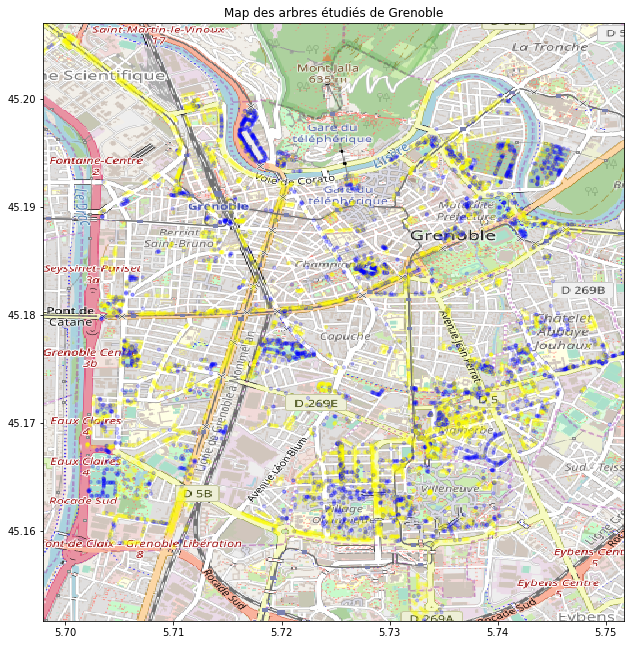

In [325]:
fig, ax = plt.subplots(figsize = (16,11))
ax.scatter(V_coords[:,0], V_coords[:,1], zorder=1, alpha= 0.2, c=C, s=10)
ax.set_title('Map des arbres étudiés de Grenoble')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [ ]:
defaut = np.array(data1[['Collet', 'Houppier', 'Racine', 'Tronc']])
defaut.shape

In [ ]:
Col=[]
for i in range (0,9913):
    for k in range (0,4):
        if (k==0) and (defaut[i,k]==1):
            Col.append('blue')
        elif (k==1) and (defaut[i,k]==1):
            Col.append('red')
        elif (k==2) and (defaut[i,k]==1):
            Col.append('black')
        elif (k==3) and (defaut[i,k]==1):
            Col.append('yellow')
        else :
            Col.append('green')
Col=np.array(Col)

In [ ]:
#fig, ax = plt.subplots(figsize = (16,11))
#ax.scatter(V_coords[:,0], V_coords[:,1], zorder=1, alpha= 0.2, c=Col, s=10)
#ax.set_title('Map des arbres étudiés de Grenoble')
#ax.set_xlim(BBox[0],BBox[1])
#ax.set_ylim(BBox[2],BBox[3])
#ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')